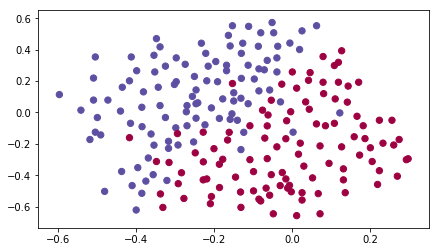

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import *
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [28]:
def model(X, Y, learning_rate=0.3, num_iterations=30000, print_cost=True, lambd=0,\
         keep_prob=1):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        if keep_prob==1:
            a3, caches = forward_propagation(X, parameters)
        elif keep_prob<1:
            a3, caches = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        if lambd== 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
        assert(lambd==0 or keep_prob==1)
        
        if lambd==0 and keep_prob==1:
            grads = backward_propagation(X, Y, caches)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, caches, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, caches, keep_prob)
            
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration %d: %f", i, cost)
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration %d: %f 0 0.655741252348
Cost after iteration %d: %f 10000 0.163299875257
Cost after iteration %d: %f 20000 0.138516424232


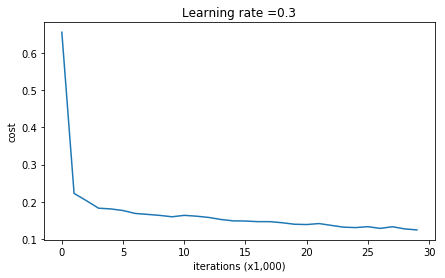

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


In [3]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

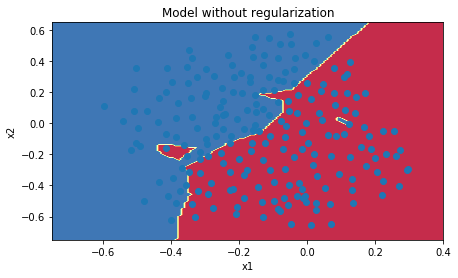

In [4]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [10]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    cross_entropy_cost = compute_cost(A3, Y)
    #regularization公式见《提点深度学习实用层面》
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) \
        + np.sum(np.square(W3))) / (2 * m)
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost
    
# A3, Y_assess, parameters = compute_cost_with_regularization_test_case()
# print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, \
# lambd = 0.1))) 

def backward_propagation_with_regularization(X, Y, caches, lambd):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = caches
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd * W3 / m
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd * W2 / m
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd * W1 / m
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

# X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()
# grads = backward_propagation_with_regularization(X_assess, Y_assess,cache, lambd = 0.7)
# print ("dW1 = "+ str(grads["dW1"]))
# print ("dW2 = "+ str(grads["dW2"]))
# print ("dW3 = "+ str(grads["dW3"]))

dW1 = [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = [[-1.77691347 -0.11832879 -0.09397446]]


Cost after iteration %d: %f 0 0.697448449313
Cost after iteration %d: %f 10000 0.268491887328
Cost after iteration %d: %f 20000 0.268091633713


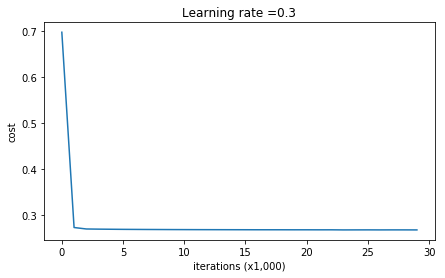

On the training set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


In [16]:
parameters = model(train_X, train_Y, lambd= 0.7)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

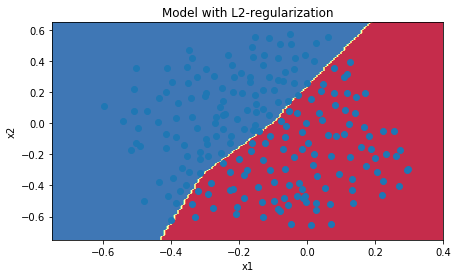

In [17]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [34]:
def forward_propagation_with_dropout(X, parameters, keep_prob=0.5):
    #dropout中必须要设置random seed，才能保证正反向传播在对应层的dropout情况一致
    #或者在各层cache中保存D也行
    np.random.seed(1)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob)
    A1 = A1 * D1
    A1 = A1 / keep_prob
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob)
    A2 = A2 * D2
    A2 = A2 / keep_prob
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    caches = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, caches

# X_assess, parameters = forward_propagation_with_dropout_test_case()
# A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
# print ("A3 = " + str(A3))

def backward_propagation_with_dropout(X, Y, caches, keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = caches
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dA2 = dA2 * D2  #和np.multiply一样，矩阵对应位置相乘
    dA2 = dA2 / keep_prob
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration %d: %f 0 0.654391240515


D:\my_github\nn_practice\cousera_assignment\regulation\reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\my_github\nn_practice\cousera_assignment\regulation\reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration %d: %f 10000 0.0610169865749
Cost after iteration %d: %f 20000 0.0605824357985


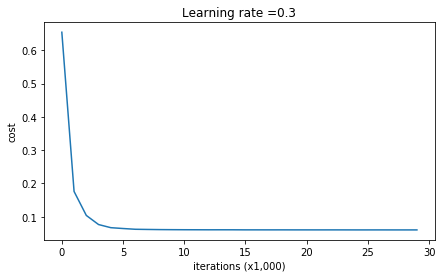

On the train set:
Accuracy: 0.928909952607
On the test set:
Accuracy: 0.95


In [35]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

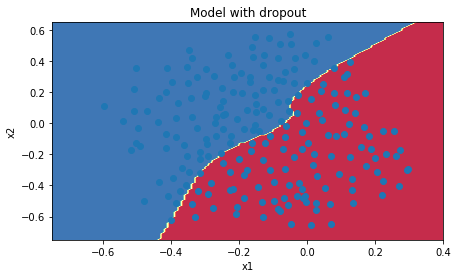

In [36]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)